# Final Project for Python Driving License

#### <div style="text-align: justify">This project is developed in order to satisfy needs regarding our Ph.D. research activities. For our Ph.D. project we use the nuclear accidental modeling tool RELAP5, which has been developed by the Nuclear Regulatory Commission (NRC) of USA. Despite the fact we have the license of this modeling tool available, there is a separated license for using the post-processing tool associated, for which we don't have the license. Altought we can get the license by means of Polimi, this bureaucratic process can take some time, so it's useful to have another tool for this purpose. </div>

## Aims of the final project
#### Based on the needs we have in our respective Ph.D. projects, we need a code implemented in python with the following functions: 
- <div style="text-align: justify"> Have available a vector with data from the simulation in order to perform graphical analysis. Since the output data is stored in binary files, with a very particular organization, some effort need to be put into decode this file to obtain arrays with the evolution of variables over time, or profiles along determined components (i.e., the fluid temperature along a pipe). </div>
- <div style="text-align: justify"> Have a way of performing parametric analysis by varying one parameter at a time of the input file of the modeling tool. The idea regarding this need, is to avoid the process of having to modify each input for the parametrization analysis and then run each case, all manually, and process that can be very time consuming. </div>
- <div style="text-align: justify"> Have a way of contrasting the simulations with experimental data from the actual facility. For this purpose it will be necesary a way of importing to python the experimental data (usually saved in matlab files), and to implement some functions to compare the results from the simulations with the experimental ones.</div>

Based on these needs, the software here presented is thought to be used on a parametric analysis of a model implemented in RELAP of the Dynasty experimental facility (a natural circulation experimental facility located at Bovisa Campus). The aim of this parametric analysis is to make a sensitivity analysis of some parameter from the input, like power, or convection coeficients, to understand how they affect the simulation, and therefore, to compare those simulations with experimental data coming from the actual facility.




## Solutions proposed and libraries used

<div style="text-align: justify">
Based on the needs previously listed, the solution proposed is divided in the phases mentioned below. The program is thought to be implemented in the most generic way possible, in order to recycle the code for other uses, however there are always limitations imposed by the particular application. Something that worths to specify is that it is also included the command that allows to raise exceptions. This is used to stop the entire program when something has not been done correctly, and to help the user to fix what is wrong.
</div>

#### Data collection
<div style="text-align: justify">
A class is implemented to import all the data, this includes not only the data coming from the output simulations, but also the experimental data, which is usually stored in matlab data files. The atributes of this class are two vectors, a list with the times, and a numpy array with the values of the desired variable from the dataset, being the dataset either the simulation output or the experimental data. In the case that a profile is required (e. g., water temperature over a pipe) instead of a time-evolution set of some particular variable, a third atribute is specified for the x-axis of the profile.
</div>

<div style="text-align: justify">
Regarding the methods, it has been only implemented an initializer. This method has an inner selector of how to initialize the data, either by reading the simulation data, or the experimental one. For developing this part of the code, three libraries were used:
</div>

- <div style="text-align: justify"> Scipy for reading the data from a matlab data file. </div>

- <div style="text-align: justify"> Struct to unpack packs of binary data into sets of characters, integers, or doubles, depending on each case.  </div>

- <div style="text-align: justify"> The atribute asociated to the variable is stored as a numpy array in order to be able to easily perform mathematical operations with it. </div>

#### Input modification and simulation execution

<div style="text-align: justify">
    For the input modification, first of all, there is an interface by means of which the user is required to specify the parameters he want to change in the parametrization analysis. For this, the user is required to specify some features of this parameters regarding on how to find them in the input, and also how to vary the parameter. Based on this, two for loops are set in order to iterate over the different parameters of parametrization, and a nested for to iterate over the different values of each parameter. Inside the two nested-for loops, there are functions that open the input file, find the parameter location, and modify it overwriting the entire input file.     
</div>

<div style="text-align: justify">
After the input file it's modified, there is a function that executes a batch file that at the same time executes RELAP. This function checks if there was any mistake during the simulation, and in that case, raises an exception that stops the execution of all the program, letting know the user about the fail in the simulation. It worths to remember that each input modification and each run of the batch file ocurres for each value of each parameter, it means, these part of the code it's inside the two nested foor loops.
</div>

<div style="text-align: justify">
For developing this part of the code, three libraries were used:
</div>

- <div style="text-align: justify"> Pandas for for storing the data related on what to parameterize specified by the user. </div>

- <div style="text-align: justify"> Subprocess to run the batch file containing the program.  </div>

- <div style="text-align: justify"> Numpy for storing some data in arrays.</div>

#### Simulation post-processing

<div style="text-align: justify">
    The post-processing code is executed everytime a simulation is finished. By instantiating the class to import data previously specified, the experimental data is imported only once and at at first. On the other hand, everytime a simulation is finished, several instances of this class are made to import output data from the simulation. To stablish what variables from experimental and analytical outputs are going to be compared, at the beggining there is a function that is called to ask the user what variables he wants to analyze. He can decide over five variables, four of them related with water temperatures, and the another one to mass flow rate. The user can specify which of these variables he wants to analyze, and then both the experimental data imported and also the analytical data imported, will correspond with this variables.
</div>

<div style="text-align: justify">
    The post-processing code is executed everytime a simulation is finished. By instantiating the class to import data, previously specified, the experimental data is imported only once and at first. On the other hand, everytime a simulation is finished, several instances of this class are made to import output data from the simulation. Since the experimental data and the analytical one may not have the same discrete values of time, despite the fact that they may have data over the same time lapse. Therefore, an extrapolation needs to be done in order to know exactly what the values of the simulated variables are at exactly the same time at which experimental data was acquired. Once this last step is done, the absolute value of de difference between the experimental and the simulated  data is done. This allow to obtain a vector of "errors" which is stored in a DataFrame instance.
</div>

<div style="text-align: justify">
    Finally, once the group of arrays of errors is obtained for all the simulations, this data is plot by using the library matplotlib
</div>

<div style="text-align: justify">
For developing this part of the code, the libraries used were:
</div>

- <div style="text-align: justify"> Pandas for storing the arrays of errors. </div>

- <div style="text-align: justify"> Matplotlib for plotting.  </div>

- <div style="text-align: justify"> Numpy to perform operation among arrays.</div>

- <div style="text-align: justify"> Scipy to perform the interpolation previously described.</div>


# Code implemented in each phase




## Data collection
<div style="text-align: justify">
The output data from RELAP is stored in a file with the extension ".r", where the "r" comes from "Restart". This file is a binary file that contains the information as if it were in a matrix like the one presented below. The row labeled as plotinf contains just information regarding the simulation. Then, the row labeled as plotalf contains the name of all variables that available to plot. Since for different components from the Simulation (due to the fact it's a nuclear reactor with different pipes, tanks, etc.) many variables are the same, the row plotalf may have repeated words, for example, component 201 has specified the fluid temperature "tempf", but also component 202 has it. Then, it follows the plotnum row, which contains the specification of what component refers the previous row. For example, according to the table, the liquid density "rhof" of the second column, corresponds to the component 101010000. All the variables that do not belong to a specific component, like power, time or nuclear reactivity, have either the component number 0 or 1.  Finally, the plotrec rows contain the values of the variable and component specified at the same column in the rows plotalf and plotnum. Each row of plotrec corresponds to a different time of the simulation.
</div>
    
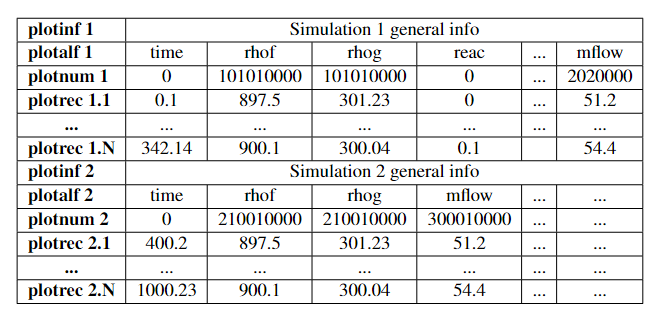

<div style="text-align: justify">
It can be noted that in the table shown as an example, there is more than a set of "plotinf", "plotalf" and "plotnum". This is due to the fact that once the simulation is completed, another run can be made starting at some point from a previous simulation, and that's the reason why it's called "restart". This new simulation can contain different components than the previous one, or the user can request different variables as outputs. Therefore there could be a different number of columns with data, or these can be organized in a different way. Furthermore, this process of restarting the simulation can be done in an unlimited basis. For this reason, if it's needed to get a specific variable for a specific component, the relative column should be found for each set of plotinf, plotalf and plotnum.
</div>

<div style="text-align: justify">
In addition to the data organized like it's shown in the table, after each keyword there are some bytes with information that is generally ignored. However, it worths to mention that the after the plotinf's, there are some of bytes with integers indicating how many rows has the data set. This information is then used to calculate indexes that help to find all the data needed.
</div>

<div style="text-align: justify">
It is necessary to clarify that despite the fact that here it's shown as if it were a matrix, the binary file is a continuous line of binary data, in which data can be identified by finding the keywords "plotinf", "plotalf", "plotnum" and "plotrec".
</div>

### Keywords searcher

<div style="text-align: justify">
Below it's shown the first section of the code, with an auxiliary function called whichIndexFourth and the function searcher. By reading the binary file and using the function read, the function searcher is in charge of finding the position of all the set of keywords. Then, the output of the searcher should be something like:
</div>
$
[[plotinf_1, plotalf_{1}, plotnum_{1}, [plotrec_{11}, ..., plotrec_{1n}], ..., [plotinf_{n}, plotalf_{n}, plotnum_{n}, [plotrec_{n1}, ..., plotrec_{nn}]]
$

<div style="text-align: justify">
Since first of all, all the plotinf are found, and put in a list, the rest of the keyword positions are searched after and added to the list according to the position in which they were found. The function whichIndexFoirth is used to know in which part of the list should be added each plotalf, plotnum and plotrec found. Therefore, the output of searcher will be a list of N elements, where N represent the number of restarts. And each element will have the position of the plotinf, plotalf and plotnum keywords, and the position of all the correspondings plotrecs inside the binary file, where the actual variables are stored.
</div>


In [29]:
import numpy as np
import struct
from scipy.io import loadmat

def whichIndexFourth(find, memory, keywords_p):
    
    x = range(len(keywords_p)-1, -1, -1)
    for i in x:

        if(find > keywords_p[i][0] and find != -1):

            if(memory == i):
                return i, True
            else: # siempre va a else en el caso de plotalf y plotnum
                
                return i, False
    
        return -1, 0

def Searcher(keywords):

    keywords_p = []
    for i in range(len(keywords)):

        start = 0
        counter = False
        index = -1
        start = read.find(keywords[i], start)

        while(start != -1):

            if(i==0): # a plot inf

                keywords_p.append([start])

            elif(i==3): # a plotrec

                index, counter = whichIndexFourth(start, index, keywords_p)
                
                if(counter):
                    keywords_p[index][3].append(start)
                
                else:
                    
                    keywords_p[index].append([start]) 
            
            else: # a plotalf y plotnum

                index, _ = whichIndexFourth(start, index, keywords_p)
                keywords_p[index].append(start) 
                
                        
            start = read.find(keywords[i], start + 1)
    print(len(keywords_p))
    return keywords_p


### Number of columns
<div style="text-align: justify">After each plotinf keyword, there are two integers (4-bytes each) containing information regarding the number of columns. The function sizeDataVector is used to decode this information, that then is used to find indexes of data that is being looked for.</div>

In [30]:
def sizeDataVector():

    sizeVector = [[] for _ in range(len(keywords_p))]
    
    for it in range(len(keywords_p)):
        startpoint = keywords_p[it][0] 
        word1 = struct.unpack('I',read[startpoint+12:startpoint+16])[0]
        word2 = struct.unpack('I',read[startpoint+20:startpoint+24])[0]
        sizeVector[it] = [word1, word2]

    return sizeVector

### Finding the index

<div style="text-align: justify">
When we refer index, we mean the relative position of the column of a given variable for a given component, respect to the data set. We want to find this index for every data set (set of plotinf/alf/num and their respectives plotrecs), in order to find the variable we are looking foor easily.
</div>

#### Function lookforRangeComponent
<div style="text-align: justify">
To find the index in a given data set, we look in the plotnum set, where the name of each component is saved. The entire pack of name (int numbers) of all the components is unpacked as unsigned integers in a numpy array. Then by using the method "where" of numpy, we save all the index of the elements of the numpy array that are equal to the component we are looking for. This vector (named in the code as X) will have a set of possible indexes, which are all the variables related to the particular component we are looking for. 
</div>
    
    
#### Function getIndex
<div style="text-align: justify">
After that, the function getIndex receives as an argument this vector of possibles as well as the string with the name of the variable we are looking for. Then, by means of a for loop, this function unpacks groups of 8 character bytes (8 variables of type char) of all the columns in the plotalf row that the function lookForRange component found as possibles. These characters are decoded to transform them in python "str" (strings) and stored in the "plot_alf" internal list. Then, by using the function numpy where, the position of where is stored the desired variable for a given data set (setD variable) is retrieved.
</div>
    
    
<div style="text-align: justify">
It should be clarified that in the function getIndex it's necesary to use the decode() function because of two reasons: 1)the struct.unpack() function is capable of extracting only fixed-size binary data (integers or floats for example) from the binary file; and 2) Strings in python are represented in unicode characters and the binary data need to be converted from the 'utf-8' encoding. On the other hand, it also worths to be noted that this process of finding the "column" where the variable is stored is done for each dataSet (that's why there is an argument setD), being a dataSet the set of plotrec's of a given plotinf/num/alf.
</div>

#### Function lookforIndexWhenGlobalVariable
<div style="text-align: justify">
In case we are looking for a "global variable", which means a variable that do not corresponds to a specific component, but rather to the whole system, like time or nuclear reactivity, we only have to look for it in the plotalf row, since it'll be just only one column with the name of the variable. This is actually what this function does, and when it finds the position, returns an integer corresponding to the index of the "column" where the variable is stored for a given dataset.
</div>


In [31]:
def lookforRangeComponent(RowNumb, setD, componente):

    plot_num = np.array([str(s) for s in struct.unpack('<'+(RowNumb-2)*'Q'+'I',read[keywords_p[setD][2]+12: keywords_p[setD][2] + RowNumb*8])] )
    x = np.where(plot_num == componente)
    
    return x

def getIndex(setD, X, variable):

    contador = -1
    if(len(variable)<8):
        contador = 8 - len(variable)
        while (contador > 0):
            variable = variable + " "
            contador+= -1
    
    plot_alf = []
    for xi in X[0]:
        plot_alf.append((struct.unpack('8s',read[keywords_p[setD][1]+8*(1+xi):keywords_p[setD][1] + 8*(2+xi)])[0]).decode('utf-8'))
        
    plot_alf = np.array(plot_alf)

    index = X[0][np.where(plot_alf == variable)]
    
    return index

def lookforIndexWhenGlobalVariable(variable, setD):

        index=-1
        contador = -1
        if(len(variable)<8):
            contador = 8 - len(variable)
            while (contador > 0):
                variable = variable + " "
                contador+= -1
        
        variable = variable.encode(encoding = 'UTF-8')  

        first = read.find(variable, keywords_p[setD][1], keywords_p[setD][2])
        last = read.rfind(variable, keywords_p[setD][1], keywords_p[setD][2])
        
        if(last == first and last!= -1):
            index = int((last - (keywords_p[setD][1] + 8))/8)
            return index
        else:
            raise Exception("Global system variable not found")

### Getting the array variable when a data trend is requested

<div style="text-align: justify">
In the following lines we can observe the main functions in case we want to look for a trend variable, which means the temporal evolution of the variable. First of all, the function lookForVectorVariable is the one that returns a numpy array with all the values of a variable of a specific component. This function has two parts, depending on whether the variable required is a global one or not. First of all, it scrolls through all datasets with a for loop, and in each one of them, it looks for the index of the variable. After obtaining the index, it append the values of each plotrec of the dataset. Once all values from the restart file are in the list, this last is converted into a numpy array and returned.
</div>

<div style="text-align: justify">
The InitTrend function is one of the functions used to initialize the class implemented to import data, it takes as arguments the name of the file, the variable and a list of components. Firts of all, it creates an instance of two global variables: "keywords_p" where the positions of the keywords will be stored and "read", where the read binary file is stored. After these instances, the function open the binary file, reads it, and calls the function searcher to look for the position of the keywords. Then, it creates a list of empty lists with a length of N elements, where N is the number of the component list taken as argument. Then, by using the lookForVectorVariable function it stores the variable for each component in the empty list, and also it saves the value of the "time" variable. Finally, a tuple of the list of times, and the list of lists of component variables is returned.
</div>


In [32]:
def lookForVectorVariable(componente, variable):
    size = sizeDataVector()
    
    
    index = 0
    values = []
    if (componente=="1" or componente=="0"):
        for i in range(len(keywords_p)):
            
            index = lookforIndexWhenGlobalVariable(variable, i) 

            for k in range(len(keywords_p[i][3])):                
                values.append(struct.unpack('f',read[keywords_p[i][3][k]+8+4*index:keywords_p[i][3][k]+8+(index+1)* 4])[0])     

        values = np.array(values)
        return values

    else:
        for i in range(len(keywords_p)):

            x = lookforRangeComponent(size[i][0], i,componente)
            index = getIndex(i, x,variable)[0]
            for k in range(len(keywords_p[i][3])):
                values.append(struct.unpack('f',read[keywords_p[i][3][k]+8+4*index:keywords_p[i][3][k]+8+(index+1)* 4])[0])     

        values = np.array(values)
        return values
    
def InitTrend(variable, componentes, sourceFile):

    global keywords_p
    global read
    keywords = [b"plotinf ", b"plotalf ", b"plotnum ", b"plotrec "]
    with open(sourceFile+".r", 'rb') as restart:
        read = restart.read()
    restart.close()
    keywords_p = Searcher(keywords)
    
    values = [[] for c in componentes]
    time = []
    for it in range(len(values)):
        values[it] = lookForVectorVariable(componentes[it], variable)
    time = lookForVectorVariable("0", "time")

    return time, values



### Getting the array variable when a profile is requested

<div style="text-align: justify">
The function searchPointerGivenTime looks for the position of the plotrec which meets the requirement that its time is lower or equal than the time we are looking for. To do so, it scrolls through all plotrecs from all datasets looking for the time values until it finds the first that meets the specific requirement. Then it returns the position of the specific plotrec.
</div>



<div style="text-align: justify">
The function dataGivenTimeProfile is the one that returns the profiles of determinated variable in determinated components for a list of times. It receives as arguments a list of times, the components of the profile (for example different sections of a pipe) and the name of the variable. First, the functions creates a list of empty lists of a length N, where N is the length of the list of times taken as argument, to be used to save the variable's profiles for different times. After, the function iterates with a for loop the list of times, and for each time, finds the value of the variable for each component by using the functions searchPointerGivenTime, lookforRangeComponent and getIndex. This list of values representing the profile are saved in the elements of the list of empty lists, and then this list is converted to a numpy array of lists, and returned in a tuple along with the list of times taken as argument.
</div>

<div style="text-align: justify">
The initProfile function is used to initialize the class used to import data in case that a profile type of data is required. The function takes as arguments the variable name, the components conforming the profile, the list of times and the name of the file. It also declares two global variables for the binary file read and for the positions of the keyword. Then by using the function dataGivenTimeProfile it looks for the profiles of each time and return them along with the list of times taken as argument.
</div>

In [33]:

def searchPointerGivenTime(t1):

    t1 = float(t1)
    for i in range(len(keywords_p)):            
        index = lookforIndexWhenGlobalVariable("time", i)

        for k in range(len(keywords_p[i][3])-1, -1, -1):            
            tiempo = struct.unpack('f',read[keywords_p[i][3][k]+8+4*index:keywords_p[i][3][k]+8+(index+1)* 4])[0]     
            if(t1 >= tiempo):
                return i, keywords_p[i][3][k]
    return -1, -1


def dataGivenTimeProfile(tiempos, componentes, variable):

    values = [[] for t in tiempos]
    size = sizeDataVector()
    for it in range(len(tiempos)):
        for comp in componentes:
            i, plotrec = searchPointerGivenTime(tiempos[it])

            x = lookforRangeComponent(size[i][0], i,comp)
            index = getIndex(i, x,variable)[0] 
            values[it].append(struct.unpack('f',read[plotrec+8+4*index:plotrec+8+(index+1)* 4])[0])

    values = np.array(values)

    return tiempos, values


def initProf(variable, componentes, tiempos, sourceFile):
     
    global keywords_p
    global read
    keywords = [b"plotinf ", b"plotalf ", b"plotnum ", b"plotrec "]
    with open(sourceFile+".r", 'rb') as restart:
        read = restart.read()
    restart.close()
    keywords_p = Searcher(keywords)
    times, values = dataGivenTimeProfile(tiempos, componentes, variable)
    times = [float(i) for i in times]
    return times, values

### Class to store the data

<div style="text-align: justify">
This is the class implemented to import data from the RELAP restarts files, either for a time-evolution graph or for a profile graph, and from Matlab data files (with matlab only time-evolution graphs are implemented). The atributes defined depend on whether the data to be imported is for a time-evolution or a profile graph, for the first case only a time list atribute and a array of variables are defined, meanwhile for a profile, also the x-axis is an atribute that should be provided as an input when an instance of the class is created. By means of conditionals of boolean variables the initilizator decides how to initialize the atributes. In the particular case of a matlab data file with experimental data, data is imported by using the loadmat function from scipy.io. The data imported from matlab is contained in not very well organized arrays. The selected arrays to initialize the atributes depend on what kind of experimental data de user wants to import from matlab.
</div>

In [34]:
class DataSet:
    def __init__(self, variables, components, nameFile, times=[], fromRelap=True,  dataLabel = "", isTrend = True, dx=[]):
        if fromRelap:
            if isTrend:
                self.times, self.vars = InitTrend(variables, components, nameFile)
            
            else:
                self.x = dx
                self.times , self.vars = initProf(variables, components, times, nameFile)
        
        else:

            matlabData = loadmat(nameFile+'.mat')['data'][0][0][0][0][0] # This accomodates the data into a dictionary
            if variables == "tc1":
                self.times = matlabData[0][0]
                self.vars = matlabData[1][0] + 273.15
    
            elif variables == "tc2":
                self.times = matlabData[0][0]
                self.vars = matlabData[2][0] + 273.15

            elif variables == "tc3":
                self.times = matlabData[0][0]
                self.vars = matlabData[3][0] + 273.15
                
            elif variables == "tc4":
                self.times = matlabData[0][0]
                self.vars = matlabData[4][0] + 273.15
                
            elif variables == "mflow":
                self.times = matlabData[0][0]
                self.vars = matlabData[10][0]
            else:
                
                raise Exception("Please, choose a variable of the following list:\ntime, tc1, tc2, tc3, tc4, mflow (respect the lower cases)")


## Input modification and simulation execution
<div style="text-align: justify">
These are the functions used for the process of input modification and execution. However, all these functions are included in a main function called "main", which is explained at the end of this folder.
</div>

<div style="text-align: justify">
First of all, by means of the function defParameters() the user is asked what variables he wants to parameterize by means of the input() command. This data is stored in a DataFrame with the following structure:
</div>

$
\lbrace "Cards": 20290105,  "NumbWords": 2, "Parameters": [120.4, 133.2, 10], "Label": "power"\rbrace
$


<div style="text-align: justify">
Each row of the dataFrame represents a parameter on which the parametric analysis is going to be made. The first column is a card to identify the row of the input file, while the second column is used to identify the column of the parameter we want to change. The third column contains the tuple of three variables, the first two are floats while the last one is an integer, finally, the last columns contains a label for the parametrization of that variable. The following figure shows an example of a section of the input.
</div>

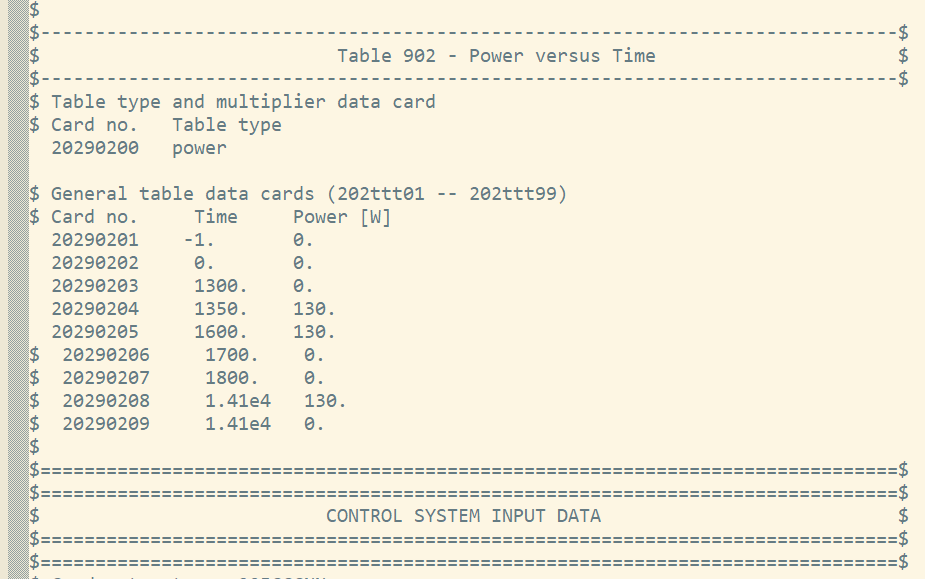


<div style="text-align: justify">
The function parametrization takes as arguments three variables, the minimun and maximun desired (floats) and an integer that's the number of the inner intervals to divide the difference between maximun and minimun. With this information, the function returns a list with al the values of parametrization for a specific parameter.
</div>

    
<div style="text-align: justify">
After this we have four functions used to localize the exact position of the parameter to be changed from the input. The functions getCardLocation, getWordLocation and getLastWordPosition are auxiliary functions used in the function getLocation, which returns the input's positions where the parameter starts and ends. The function getCardLocation finds the row where the parameter is located, while getWordLocation finds where this parameter starts, and getLastWordPosition, where it ends.
</div>

<div style="text-align: justify">    
Once the variable is located in the input, the function overWriteInput overwrites the input file with the new parameter. To do so, it takes as arguements the positions where the parameter starts and ends, and also the new paraemeter. Then, it reads in an string the input until the position where the parameter starts, and in a second string reads the input starting from the position where the parameter ends and until the end of the file. Then, concatenates this two arrays with another string in between with the value of the new parameter. Then, with this new string concatenated, the input file is over written.
</div>

<div style="text-align: justify">    
Finally, the function runner() uses the subprocess library to run the a batch that is located in the local folder. The batch needs some files to perform the simulation and also the input to be located in the same local folder, therefore, always that all of them are correctly located respecting the batch, the run will perform its task correctly. The results of the subprocess runner are stored in a local variable. Among different things that the run returns, also returns a string with some information (usually visible in the command prompt) about the run, by analyzing it we raise an exception in case that the simulation has nos been ended due to some error.
</div>


In [35]:
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline




def defParameters():
    parDat = pd.DataFrame()
    number = input("Please define the number of parameters you gonna change: ")
    for i in range(int(number)):
        if i == 0:
            card = input("\nPlease define the card you gonna change: ")
            numbW = input("Please define the Nº of word you wanna change from the previous card: ")
            minim = input("Please define minimum value of parametrization: ")
            maxim = input("Please define maximum value of parametrization: ")
            n = input("Please define the nº of parametrization subdivisions: ")
            label = input("Please define a label for this parameter: ")
            data = {'Cards': int(card), 'numbWords': int(numbW), 'Parameters' :[(float(minim), float(maxim), int(n))], 'Label': str(label),}
            
            parDat = pd.DataFrame(data)
            
    
        else:
            card = input("\nPlease define the card you gonna change: ")
            numbW = input("Please define the Nº of word you wanna change from the previous card: ")
            minim = input("Please define minimum value of parametrization: ")
            maxim = input("Please define maximum value of parametrization: ")
            n = input("Please define the nº of parametrization subdivisions: ")
            label = input("Please define a label for this parameter: ")
            
            parDat.loc[len(parDat.index)] = [int(card), int(numbW), (float(minim), float(maxim), int(n)), str(label)] 
            
    
    return parDat
    




def parametrization(minim, maxim, nt):
    dv = (maxim - minim)/nt
    prmtVar = np.array([], dtype=float) 
    for i in range(nt + 1):
        prmtVar = np.append(prmtVar, np.array([float(minim+dv*i)]))
    return prmtVar

def getCardLocation(name, card):
    f = open(name+".i", "r")
    readInp = f.read()
    f.close()
    itshere = readInp.find(str(card))
    if itshere == -1:
        excep = "The card "+str(card)+" is not present in the input"
        raise Exception(excep)
    else:
        return itshere+len(str(card))
    
    return


    
def getWordLocation(name, afterCard, word):
    f = open(name+".i", "r")
    readInp = f.read()
    f.close()
    n = 0
    stillTheSame = False
    wordNumb = 0
    while True:
        
       
        if not readInp[afterCard + n: afterCard + n + 1].isspace() and not stillTheSame: 
            wordNumb = wordNumb + 1
            stillTheSame = True
        
        elif readInp[afterCard + n: afterCard + n + 1].isspace() and stillTheSame:
            stillTheSame = False
        
        elif readInp[afterCard + n: afterCard + n + 1] == '\n':
            raise Exception("Word not found, please check your input")
            return

        elif wordNumb == word:
            return afterCard+n
        
        else: 
            n = n + 1
        
    return

    
def getLastWordPosition(startWord, name):
    f = open(name+".i", "r")
    readInp = f.read()
    n = startWord
    f.close()
    while True:
        
        if readInp[n : n + 1].isspace() or readInp[n : n + 1]=='\n' :
            return startWord, n
        
        else:
            n = n + 1
    
    
    
    
    
    return

def getLocation(name, card, word):
    afterCard = getCardLocation(name, card)
    first = getWordLocation(name, afterCard, word)
    first, last = getLastWordPosition(first, name)
    
    return first, last 

    
def overWriteInput(name, tupleWord, parameter):
    f = open(name+".i", "r")
    readInp = f.read()
    strPrimo = readInp[:tupleWord[0]]
    strDopo = readInp[tupleWord[1]:]
    f.close()
    f = open(name+".i", "w")
    parameter = round(parameter, 3)
    
    f.write(strPrimo+str(parameter)+strDopo)
    f.close()
    return    


    
def runner():
    result = subprocess.run(['corre.bat'], shell=True, capture_output=True, text=True)
    error = result.stdout.find("********")
    if error != -1:
        raise Exception("Error message: There has been an error during the simulation, please check the relap output file")
    else:
        return False

    return





## Simulation Post-Processing and Graphs

### Post-Processing

<div style="text-align: justify">    
Regarding the post-processing of the output, it's necesary to remember that we need to compare the data from the parametric analysis with experimental data, and then analyze this graphically. 
</div>

<div style="text-align: justify">    
First of all there is a function called comparationVars(), which is used to ask the user what variables from the experimental data he wants to analize, he can choose only some/all of the following: "tc1", "tc2", "tc3", "tc4" and "mflow", being "tc" temperatures from different positions of the Dynasty loop, and "mflow" the mass flow rate. This functions ask the user what variables he want to analyze by using the command input(), and then the strings with the name of the variables are returned as a list.
</div>
    
<div style="text-align: justify">    
The function emptyErrorsDataSet() is used just to create an empty dataFrame with the columns needed to store the absolute errors that result from the comparisson between the experimental data and the simulation data.
</div>
    
<div style="text-align: justify">    
The most important function regarding the post-processing is getDifferences(). This function requests as arguments the list of variables that the user wants to analize (written in comparationVars()), the name of the restart file (to read the output variables of the simulation) and a list with all the experimental data. Basically, we want to obtain a list with all the absolute errors (vectors) of the variables the user want to analize, therefore, there is a for range that iterates over these variables, calulating the error between experiment and simulation in each iteration. To do so, first the program calls the function selectVars(), which based on a string taken as an argument, it returns an instance of the class implemented to import data. Therefore, this auxiliary function returns an instance of the simulation variable representing an analogous experimental output variable. Then, since the measured times not necesarily match exactly the simulation times, we obtain extrapolated values of the simulation in order to have a vector of the simulated variable with times that match exatly the experimental times. With the new extrapolated simulation and the experimental data, we calculate the absolute erro by substracting both arrays and taking the absolute value by means of the library numpy. All the absolute error arrays are saved in a list, and then once this list is completed, it is used along with the list with the strings of all the variables the user want to analize to create a dictionary (by using the function zip we set the keys  with the list of strings and the values with the list of arrays), which is returned as output.
</div>
    
### Graphs

<div style="text-align: justify">
In what regard to the graphers, they are implemented by using the library matplotlib. To plot the errors, two functions are implemented, one of them takes as arguments the errors dataframe, the experimental variable contained in a list, and the list of strings with names of the variables that the user wants to analyze. Then, there is a for loop that goes through the different variables, and for each one of them it takes all the column with the associated errors and saves them in a list, and on the other hand the column with the labels is saved in another list. These two lists are passed as arguments to the plotOne function, which iteratively plots in an image all the errors of that variable, and also adds a title to the plot and the legends to the plots. Once the for loop of the plotAll function ends, N plot images will have been generated with the absolute errors of all the simulated variables with respect to the experimental data, where N is the number of variables considered.
</div>

In [36]:
def comparationVars():
    compVars = []
    number = input("Please define the number of variables you wanna validate: ")
    for i in range(int(number)):
        var = input("\nPlease specify the name of the variable: ")
        compVars.append(str(var))
    
    return compVars
            

def emptyErrorsDataSet(cVars):
    errors = dict.fromkeys(cVars, [])
    errDat = pd.DataFrame(errors)
    return  errDat

def selectVars(string, name):
    if string == "tc1":
        simVar = DataSet("tempf",["201110000"],name)
    
    elif string == "tc2":
        simVar = DataSet("tempf",["401010000"],name) ## CORREGIR

    elif string == "tc3":
        simVar = DataSet("tempf",["403090000"],name)
                
    elif string == "tc4":
        simVar = DataSet("tempf",["201010000"],name)
                
    elif string == "mflow":
        simVar = DataSet("mflowj",["201010000"],name)        
        
    return simVar


def getDifferences(cVars, name, expData):
    diffSet = []
    for i in range(len(cVars)):
        simVar = selectVars(cVars[i], name)
        intpltCoefSim = CubicSpline(simVar.times, simVar.vars[0])
        extrapoledSimVar = intpltCoefSim(expData[0].times[0:10000])
        diffSet.append((np.abs(expData[i].vars[0:10000] - extrapoledSimVar)))
    ret = dict(zip(cVars, diffSet))
    
    return ret

def plotOne(listErrors, ListLabels, Var, expData):
    x = expData[0].times[0:10000]
    plt.figure()

    N = len(listErrors)
    
    for i in range(N):
           
        y = listErrors[i]
        plt.plot(x, y, 'o', label = ListLabels[i])
    
    plt.xlabel("Time [s]")
    plt.ylabel("Absolute error")
    plt.title(Var)
    plt.legend()
    
    return 

def plotAll(errorsFrame, expData, cVar):
    
    for i in cVar:
        auxiliarList = errorsFrame[i].tolist()
        labels = errorsFrame['Label'].tolist()
        plotOne(auxiliarList, labels, i, expData)

    return 

## Main script

<div style="text-align: justify"> 
The main function uses the three code section previously explained. First of all, by calling the function comparationVars() it assigns to the variable cVar a list of strings with the names of the variables for which the user want to analize the absolute error between experimental and simulated data. Then, by using the function emptyErrorsDataSet(), it creates an empty dataframe to store the absolute error arrays, and by calling defParameters() it request to the user the variables to make the parametric analysis. Then, by iterative instances of the class implemented, a list is filled with all the experimental dara required. 
</div>
    
<div style="text-align: justify"> 
After this, two nested for loops are set, the firs loop iterates over the dataFrame that defines the data for the parametric analysis, and therefore over different variables to parameterize. The second loop iterates over the different values defined for each parameter by means of the function parametrization() already explained. Then for each value of the parameter, the location of the variable to be changed is found by calling the function getLocation(), and then the input is overwritten with overWriteInput(). Once the input is ready, the simulation is run, and then, if once finished the run there is not any problem, by using the function getDifferences() a new row is added to the dataFrame errorFrame with all the array errors of the variables defined in the list "cVar". Once this process is completed for all the parameters, a new column is added to the errorFrame dataFrame with a label for each row. Therefore, the structure of a row in this dataframe is given by a determinated number of columns with arrays representing the errors of the simulated variables respect to the experimental variables, and at the end a column with a string label identifying the properties of the simulation that represents the row. Finally, the function plotAll plots in different graphics the sets of errors of the variables studied.
</div>

## Example of interface input 

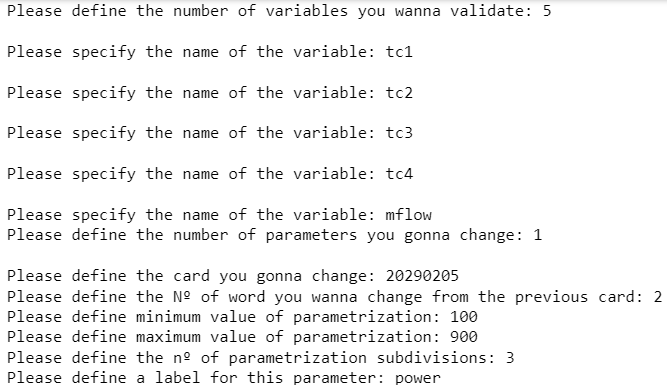

## Respective output
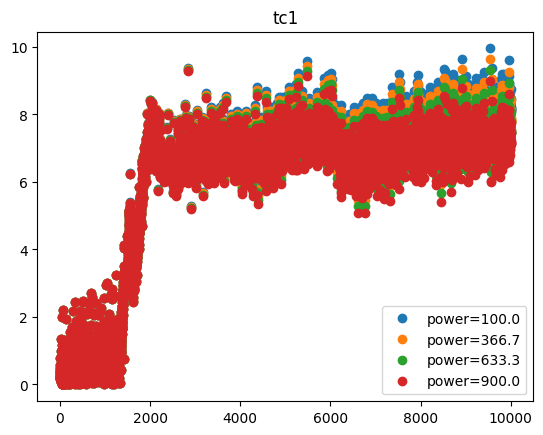

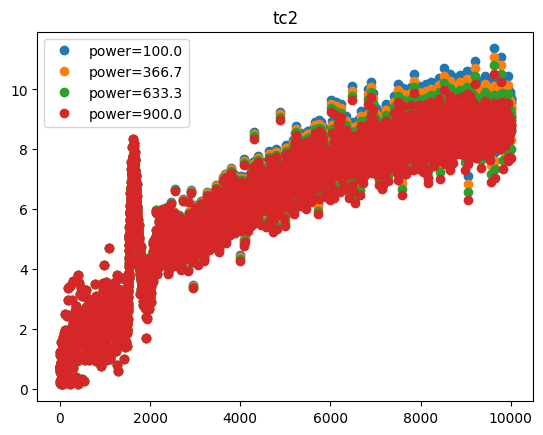

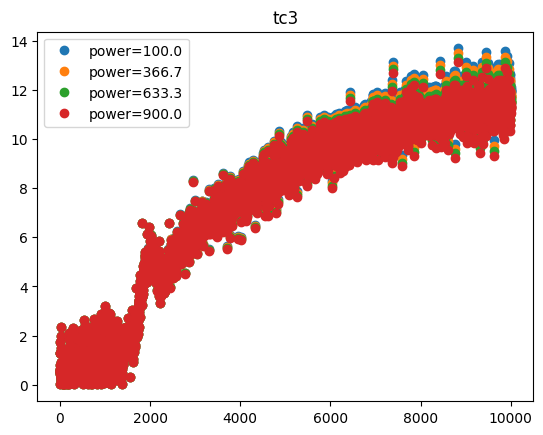

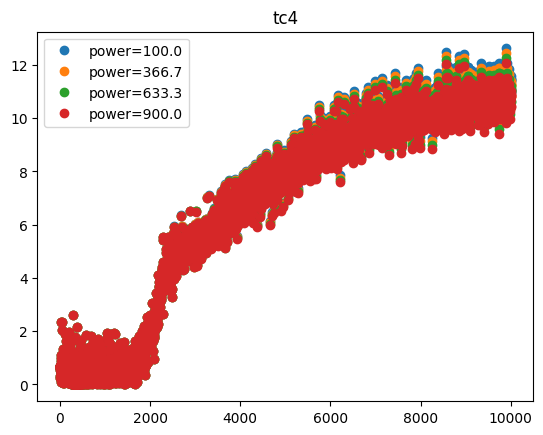

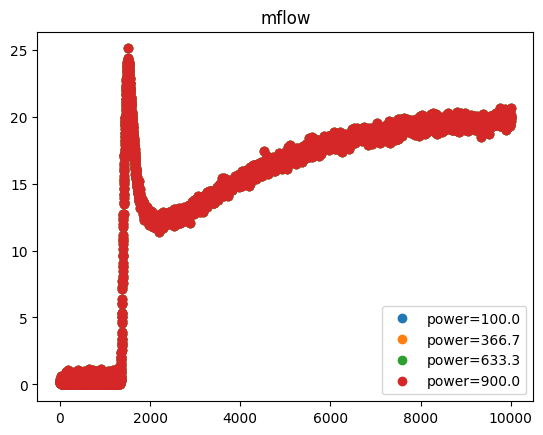

Please define the number of variables you wanna validate: 5

Please specify the name of the variable: tc1

Please specify the name of the variable: tc2

Please specify the name of the variable: tc3

Please specify the name of the variable: tc4

Please specify the name of the variable: mflow
Please define the number of parameters you gonna change: 1

Please define the card you gonna change: 20290205
Please define the Nº of word you wanna change from the previous card: 2
Please define minimum value of parametrization: 100
Please define maximum value of parametrization: 900
Please define the nº of parametrization subdivisions: 3
Please define a label for this parameter: power
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


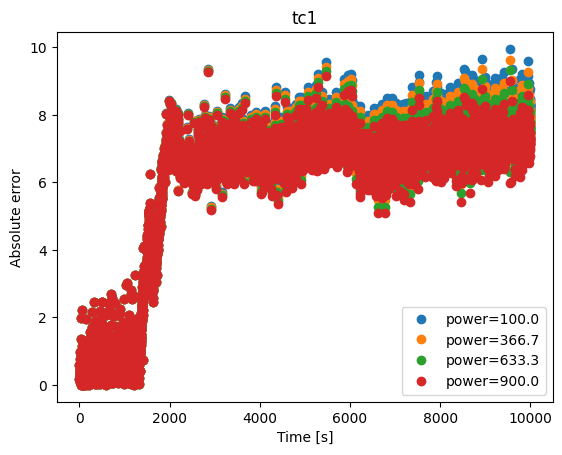

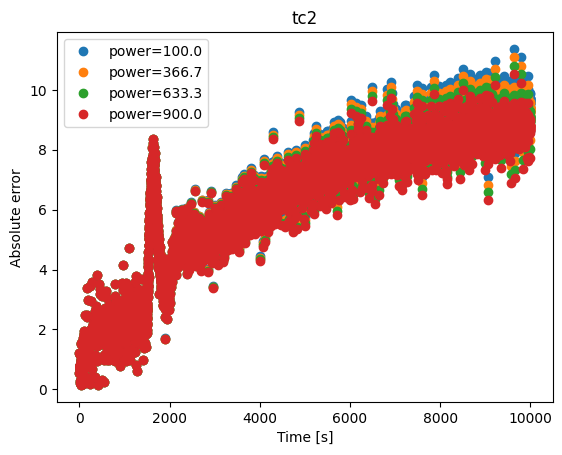

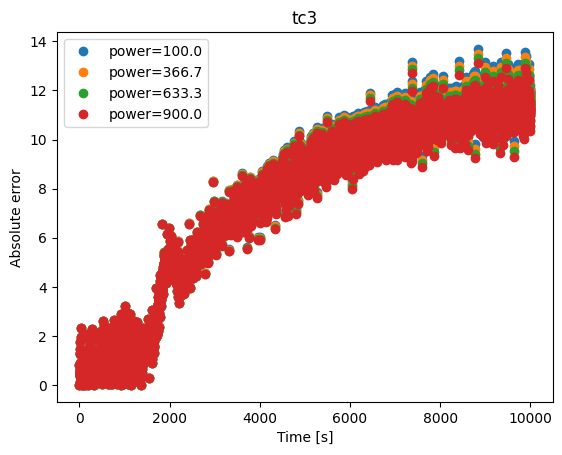

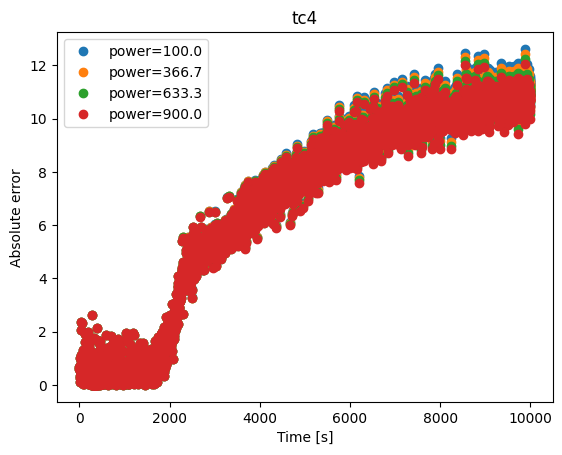

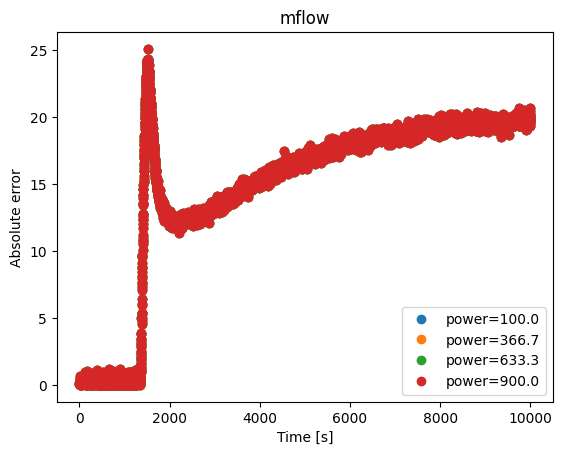

In [37]:
def main(name):
    cVar = comparationVars()
    
    errorFrame = emptyErrorsDataSet(cVar)
    param = defParameters()

    
    expData = []
    labels = []
    for c in cVar:
        expData.append(DataSet(c,[],"DynastyExperiment_20200911_0910_0", fromRelap = False))
        
    for ind in param.index:

        vectorParameters = parametrization(param['Parameters'][ind][0], param['Parameters'][ind][1], param['Parameters'][ind][2])
        sublabel = param['Label'][ind]+"="

        for P in vectorParameters:
            first, last = getLocation(name, param['Cards'][ind], param['numbWords'][ind])
            overWriteInput(name, (first, last), P)
            label = sublabel + str(round(P,1))
            labels.append(label)
            problem = runner()
            if not problem:
                errorFrame.loc[len(errorFrame.index)] = getDifferences(cVar, name, expData)
                
                
                
    errorFrame['Label'] = labels
    plotAll(errorFrame, expData, cVar)
    return errorFrame, expData, cVar

error, exp, cVar = main("Dyn_NC")


# 